In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, tree, ensemble
from sklearn.model_selection import cross_val_score

In [2]:
digits=datasets.load_digits()
X=digits.data
y=digits.target

In [3]:
#преобразование в DataFrame
'''
df=pd.DataFrame(X)
df.columns=digits.feature_names
df['target']=digits.target
df.head()
'''

"\ndf=pd.DataFrame(X)\ndf.columns=digits.feature_names\ndf['target']=digits.target\ndf.head()\n"

1. Создадим классификатор на основе решающего дерева и оценим его метрику на разных разбиениях. 

In [4]:
clf=tree.DecisionTreeClassifier()

In [5]:
scores1=cross_val_score(clf,X,y,cv=10)

In [6]:
def write_answer_1(score):
    with open("ans1.txt", "w") as fout:
        fout.write(str(score))
        
print('Значения accuracy для каждого разбиения:',scores1)
print('Среднее значение accuracy:',scores1.mean())
write_answer_1(scores1.mean())

Значения accuracy для каждого разбиения: [0.75555556 0.86111111 0.83333333 0.77777778 0.77777778 0.89444444
 0.89444444 0.81005587 0.80446927 0.7877095 ]
Среднее значение accuracy: 0.8196679081315953


2. Создадим классификатор с помощью бэггинга, количество решающих деревьев возьмем равным 100.

In [7]:
bag=ensemble.BaggingClassifier(clf,n_estimators=100)

In [8]:
scores2=cross_val_score(bag,X,y,cv=10)

In [9]:
def write_answer_2(score):
    with open("ans2.txt", "w") as fout:
        fout.write(str(score))
        
print('Значения accuracy для каждого разбиения:',scores2)
print('Среднее значение accuracy:',scores2.mean())
write_answer_2(scores2.mean())

Значения accuracy для каждого разбиения: [0.86111111 0.95555556 0.91111111 0.94444444 0.91666667 0.98333333
 0.95555556 0.91061453 0.87709497 0.91620112]
Среднее значение accuracy: 0.9231688392302917


Видно, что качество классификации улучшилось.

3. Теперь к бэггингу добавим еще один подход для улучшения качества классификации - метод случайных подпространств. Данный метод сокращает признаковое пространство наших объектов, в данном случае было принято сократить количество всех признаков _d_ до $\sqrt{d}$.

In [10]:
scores3=cross_val_score(ensemble.BaggingClassifier(clf,n_estimators=100, max_features=int(np.sqrt(X.shape[1]))),X,y,cv=10)

In [11]:
def write_answer_3(score):
    with open("ans3.txt", "w") as fout:
        fout.write(str(score))
        
print('Значения accuracy для каждого разбиения:',scores3)
print('Среднее значение accuracy:',scores3.mean())
write_answer_3(scores3.mean())

Значения accuracy для каждого разбиения: [0.89444444 0.95555556 0.93888889 0.89444444 0.93333333 0.95
 0.96111111 0.98324022 0.91620112 0.92178771]
Среднее значение accuracy: 0.9349006828057107


4. Теперь построим такую композицию деревьев, что количество признаков будет рандомизированно выбираться не просто для построения каждого отдельного дерева, а для каждой вершины каждого отдельного дерева. 

In [12]:
clf=tree.DecisionTreeClassifier(max_features='sqrt')
bag=ensemble.BaggingClassifier(clf,n_estimators=100)

In [13]:
scores4=cross_val_score(bag,X,y,cv=10)

In [14]:
def write_answer_4(score):
    with open("ans4.txt", "w") as fout:
        fout.write(str(score))
        
print('Значения accuracy для каждого разбиения:',scores4)
print('Среднее значение accuracy:',scores4.mean())
write_answer_4(scores4.mean())

Значения accuracy для каждого разбиения: [0.90555556 0.97777778 0.94444444 0.93888889 0.96111111 0.95
 0.97222222 0.96089385 0.92178771 0.94413408]
Среднее значение accuracy: 0.94768156424581


5. Построим случайный лес в явном виде.

In [15]:
rand_forest=ensemble.RandomForestClassifier(n_estimators=100, max_features='sqrt')

In [16]:
scores5=cross_val_score(rand_forest,X,y,cv=10)

In [32]:
print('Значения accuracy для каждого разбиения:',scores5)
print('Среднее значение accuracy:',scores5.mean())

Значения accuracy для каждого разбиения: [0.92222222 0.97222222 0.93888889 0.92777778 0.95555556 0.96666667
 0.96111111 0.96089385 0.91620112 0.94413408]
Среднее значение accuracy: 0.9465673494723774


Как видим, качество классификации в таком случае идентично значению, полученному на предыдущем шаге. Это подтверждает правильность выполнения задания, так как и в 4, и в 5 пунктах строился по сути случайный лес, просто с использованием разнoго функционала. 

Исследуем качество классификации в зависимости от количества деревьев.

In [25]:
def plot_scores(param, score,param_title,title):
    fig=plt.figure(figsize=(8,5))
    plt.plot(param,score,marker='o')
    plt.ylabel('Mean accuracy')
    plt.xlabel(param_title)
    plt.title(title)

In [27]:
n_trees=np.arange(10,400,10)
scores_n_trees=[]
for n in n_trees:
    rand_forest=ensemble.RandomForestClassifier(n_estimators=n, max_features='sqrt')
    scores_n_trees.append(cross_val_score(rand_forest,X,y,cv=5).mean())

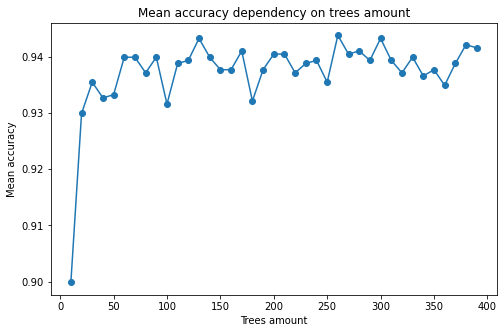

In [28]:
plot_scores(n_trees,scores_n_trees,'Trees amount', 'Mean accuracy dependency on trees amount')

По графику видно, что увеличение количества деревьев не приводит к переобучению: график колеблется около значения 0.94.

Теперь исследуем зависимость качества классификации от количества признаков, используемых при построении каждой вершины каждого дерева.

In [38]:
n_features=np.arange(int(0.1*X.shape[1]),X.shape[1],1)
scores_n_features=[]
for n in n_features:
    rand_forest=ensemble.RandomForestClassifier(n_estimators=100, max_features=n)
    scores_n_features.append(cross_val_score(rand_forest,X,y,cv=5).mean())

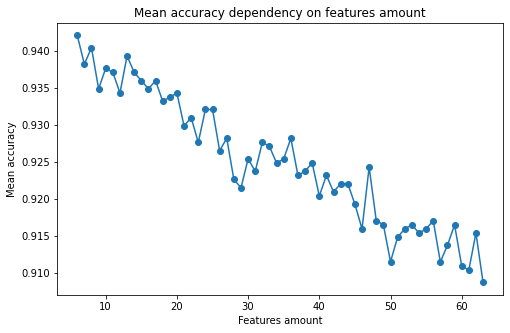

In [39]:
plot_scores(n_features,scores_n_features,'Features amount', 'Mean accuracy dependency on features amount')

Как и ожидалось, при большом числе признаков наш классификатор работает хуже, чем на маленьких подпространствах. Это объясняется тем, что при меньшем числе признаков деревья получаются более разнообразными, что позволяет их композиции давать лучший результат.

И посмотрим на то, как влияет на качество классификации максимально возможная глубина деревьев.

In [40]:
depth=np.arange(1,20,1)
scores_depth=[]
for n in depth:
    rand_forest=ensemble.RandomForestClassifier(n_estimators=100, max_features='sqrt', max_depth=n)
    scores_depth.append(cross_val_score(rand_forest,X,y,cv=5).mean())

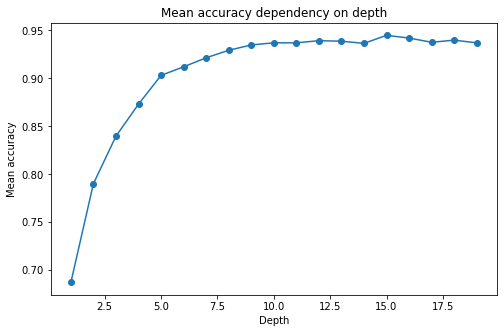

In [41]:
plot_scores(depth,scores_depth,'Depth', 'Mean accuracy dependency on depth')

In [44]:
def write_answer_5():
    with open("ans5.txt", "w") as fout:
        fout.write(" ".join([str(2), str(3), str(4), str(7)]))  
write_answer_5()